<h1><center> European Football Analysis & Data Visualization</center></h1>
In this project, we will take a look at

- FIFA Players Analysis- taking into account their different traits and styles of play
- Manchester United $vs.$ Manchester City
- Cristiano Ronaldo $vs.$ Lionel Messi - taking into account their different traits and styles of play
- Data Visualization and Analysis
- SQL in Python

# <center>1.  Importing Libraries</center>

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3 # SQLite 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
#from customplot import *

# <center> 2. Data Ingestion<center>
> ## 2.1 Create Connection to the Database

In [4]:
# Create connection
database_connection = sqlite3.connect("database.sqlite")

> ## 2.2 Import SQL Tables

In [5]:
# Select all tables
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table'; """, database_connection)
# Check if tables were read successfully
tables

type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   
2  table             Player             Player        14   
3  table              Match              Match        18   
4  table             League             League        24   
5  table            Country            Country        26   
6  table               Team               Team        29   
7  table    Team_Attributes    Team_Attributes         2   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6  CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...  
7  CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...

> ## 2.3 Let's Select Individual Data Tables

In [6]:
# Player Attributes Table
Player_Attributes = pd.read_sql_query("""SELECT * 
                                         FROM Player_Attributes
                                         """, database_connection)
# Players Table
Player = pd.read_sql("""SELECT *
                        FROM Player
                        """, database_connection)

# Matches Table
Match = pd.read_sql("""SELECT *
                       FROM Match
                       """, database_connection)

# Leagues Table
League = pd.read_sql("""SELECT *
                        FROM League
                        """, database_connection)

# Countries Table
Country = pd.read_sql("""SELECT *
                         FROM Country
                         """, database_connection)

# Team Table
Team = pd.read_sql("""SELECT *
                      FROM Team
                      """, database_connection)

# Team Attributes Table
Team_Attributes = pd.read_sql("""SELECT *
                                 FROM Team_Attributes
                                 """, database_connection)

# <center>3. Exploratory Data Analysis</center>
> ## 3.1 Shape of the tables: How many rowsin each table?

In [231]:
print("Players Attributes Table has", Player_Attributes.shape[0], "rows.")
print("Players table has", Player.shape[0], "rows.")
print("Matches Tables has", Match.shape[0], "rows.")
print("Leagues Table has",League.shape[0], "rows.")
print("Countries Table has", Country.shape[0], "rows.")
print("Teams has",Team.shape[0], "rows.")
print("Teams Attributes has",Team_Attributes.shape[0], "rows.")

Players Attributes Table has 183978 rows.
Players table has 11060 rows.
Matches Tables has 25979 rows.
Leagues Table has 11 rows.
Countries Table has 11 rows.
Teams has 299 rows.
Teams Attributes has 1458 rows.


> ## 3. 2 A look at included Countries and their leagues

In [8]:
print("Contries are:\n")
col = Country["name"]
for i in col:
    print("\t", i)

Contries are:

	 Belgium
	 England
	 France
	 Germany
	 Italy
	 Netherlands
	 Poland
	 Portugal
	 Scotland
	 Spain
	 Switzerland


>> ### 3.2.1 Merge Country Table with League Table

In [9]:
# Concatenate Country and League Tables
merged = pd.concat([Country, League], axis=1)

>> ### 3.2.2 Drop `id`, `country_id`

In [10]:
# Drop some columns
merged = merged.drop(["id", "country_id"], axis=1)

>> ### 3.2.3 Rename Columns

In [11]:
# Changing columns name with index number
merged.columns.values[0] = "Country Name"
merged.columns.values[1] = "League"
merged

Country Name                    League
0       Belgium    Belgium Jupiler League
1       England    England Premier League
2        France            France Ligue 1
3       Germany     Germany 1. Bundesliga
4         Italy             Italy Serie A
5   Netherlands    Netherlands Eredivisie
6        Poland        Poland Ekstraklasa
7      Portugal  Portugal Liga ZON Sagres
8      Scotland   Scotland Premier League
9         Spain           Spain LIGA BBVA
10  Switzerland  Switzerland Super League

> ## 3.3 Players Analysis
>> ### 3.3.1 A look at the Player Table

In [12]:
# View first 5 entries
Player.head()

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

>> ### 3.3.2 Let's `LEFT JOIN` Player Table with Player Attributes Table
- We will re-read the SQL Database again, calling players attributes that show attacking potential
- Then Select the year 2014

In [13]:
# Read SQL: LEFT JOIN Player_Attributes and Player Tables 
player_atts = pd.read_sql("""SELECT player_name,
                                    birthday,
                                    date,
                                    overall_rating,
                                    height,
                                    attacking_work_rate,
                                    crossing,
                                    finishing,
                                    shot_power,
                                    heading_accuracy,
                                    sprint_speed,
                                    agility,
                                    dribbling,
                                    reactions,
                                    defensive_work_rate,
                                    preferred_foot,
                                    free_kick_accuracy,
                                    stamina,
                                    penalties
                             FROM Player
                             LEFT JOIN Player_Attributes
                             ON Player_Attributes.player_api_id = Player.player_api_id
                             WHERE date LIKE '2014%'
                             ORDER BY date
                             """, database_connection)
# Peak at the first 5 entries
player_atts.head()

player_name             birthday                 date  overall_rating  \
0  Aaron Meijers  1987-10-28 00:00:00  2014-01-03 00:00:00            67.0   
1  Achille Emana  1982-06-05 00:00:00  2014-01-03 00:00:00            73.0   
2   Adam Lallana  1988-05-10 00:00:00  2014-01-03 00:00:00            79.0   
3    Adam Morgan  1994-04-21 00:00:00  2014-01-03 00:00:00            63.0   
4   Adama Traore  1990-02-03 00:00:00  2014-01-03 00:00:00            62.0   

   height attacking_work_rate  crossing  finishing  shot_power  \
0  175.26              medium      65.0       41.0        66.0   
1  180.34              medium      64.0       70.0        79.0   
2  172.72                high      75.0       70.0        68.0   
3  177.80              medium      39.0       67.0        61.0   
4  170.18                high      63.0       51.0        65.0   

   heading_accuracy  sprint_speed  agility  dribbling  reactions  \
0              58.0          75.0     69.0       69.0       69.0   
1              61.0          64.0     67.0       73.0       72.0   
2              67.0          76.0     84.0       84.0       73.0   
3              57.0          79.0     64.0       61.0       59.0   
4              52.0          85.0     73.0       61.0       42.0   

  defensive_work_rate preferred_foot  free_kick_accuracy  stamina  penalties  
0              medium           left                66.0     77.0       55.0  
1                 low          right                71.0     55.0       72.0  
2              medium          right                66.0     80.0       61.0  
3              medium           left                42.0     59.0       66.0  
4              medium           left                33.0     70.0       52.0

>> ### 3.3.3 How many rows and columns In the $player$_$atts$ dataframe?

In [14]:
# Dataframe shape: how many rows and columns in the given dataset?
print("There are", player_atts.shape[0], "rows/entries and", player_atts.shape[1], "features in our dataframe.")

There are 32808 rows/entries and 19 features in our dataframe.


>> ### 3.3.4 Features Data types

In [15]:
# Data types
player_atts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32808 entries, 0 to 32807
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_name          32808 non-null  object 
 1   birthday             32808 non-null  object 
 2   date                 32808 non-null  object 
 3   overall_rating       32792 non-null  float64
 4   height               32808 non-null  float64
 5   attacking_work_rate  32792 non-null  object 
 6   crossing             32792 non-null  float64
 7   finishing            32792 non-null  float64
 8   shot_power           32792 non-null  float64
 9   heading_accuracy     32792 non-null  float64
 10  sprint_speed         32792 non-null  float64
 11  agility              32792 non-null  float64
 12  dribbling            32792 non-null  float64
 13  reactions            32792 non-null  float64
 14  defensive_work_rate  32792 non-null  object 
 15  preferred_foot       32792 non-null 

>> ### 3.3.5 Are There Missing or Null values in our dataset?

In [16]:
# Null Values Check
player_atts.isnull().sum()

player_name             0
birthday                0
date                    0
overall_rating         16
height                  0
attacking_work_rate    16
crossing               16
finishing              16
shot_power             16
heading_accuracy       16
sprint_speed           16
agility                16
dribbling              16
reactions              16
defensive_work_rate    16
preferred_foot         16
free_kick_accuracy     16
stamina                16
penalties              16
dtype: int64

>> ### 3.3.6 Handling missing values- Deletion Method
- We will drop null rows

In [17]:
rows = player_atts.shape[0]

# Drop the NULL rows
player_atts = player_atts.dropna()

In [18]:
# Do we still have missing values?
player_atts.isnull().any().any(), player_atts.shape[0]

(False, 32792)

$\implies$ **How many rows did we drop?**

In [19]:
print("We dropped", rows - player_atts.shape[0], "rows with NULL values; that's about", round((16/32808)*100, 4),"% of the original dataframe")

We dropped 16 rows with NULL values; that's about 0.0488 % of the original dataframe


>> ### 3.3.7 Showing Basic Statistical Summary of the dataset 
- We will use `.describe()` function
  - $\implies$This function shows some basic descriptive statistics for all numeric columns
  - $\implies$ By default, this function only analyzes numeric columns, ut if we want to include other data types we can use the `include` parameter:

In [20]:
# Statistical Description of Numerical Values
player_atts.describe().T

count        mean        std     min    25%     50%  \
overall_rating      32792.0   68.944255   6.472284   40.00   65.0   69.00   
height              32792.0  181.766000   6.395239  160.02  177.8  182.88   
crossing            32792.0   56.210783  15.859415    8.00   46.0   60.00   
finishing           32792.0   50.930379  17.644249    6.00   35.0   54.00   
shot_power          32792.0   63.159582  15.191739   12.00   56.0   67.00   
heading_accuracy    32792.0   58.077153  14.728564   10.00   50.0   60.00   
sprint_speed        32792.0   68.325842  12.916988   20.00   62.0   70.00   
agility             32792.0   66.343986  13.543602   16.00   58.0   68.00   
dribbling           32792.0   60.916077  15.961245    6.00   54.0   65.00   
reactions           32792.0   66.464199   8.732055   20.00   61.0   67.00   
free_kick_accuracy  32792.0   50.312088  16.723411    8.00   36.0   51.00   
stamina             32792.0   67.034063  13.947762   16.00   61.0   69.00   
penalties           32792.0   54.835753  14.939184   11.00   45.0   56.00   

                       75%     max  
overall_rating       73.00   94.00  
height              185.42  208.28  
crossing             68.00   91.00  
finishing            65.00   97.00  
shot_power           74.00   96.00  
heading_accuracy     68.00   95.00  
sprint_speed         77.00   97.00  
agility              76.00   95.00  
dribbling            72.00   97.00  
reactions            72.00   96.00  
free_kick_accuracy   64.00   93.00  
stamina              76.00   95.00  
penalties            66.00   95.00

In [21]:
# Including object data types
player_atts.describe(include=np.object).T

count unique                  top   freq
player_name          32792   7685               Danilo     32
birthday             32792   4439  1991-01-07 00:00:00     42
date                 32792     51  2014-09-18 00:00:00   6429
attacking_work_rate  32792      4               medium  22285
defensive_work_rate  32792     13               medium  23858
preferred_foot       32792      2                right  24763

>> ### 3.3.8 Finding Duplicate Data

In [22]:
# Finding duplicates
dupli_df = player_atts.duplicated()
print("We have", dupli_df.sum(),"duplicates in this dataset.")

We have 0 duplicates in this dataset.


>> ### 3.3.9 Unique Entries under each Column

In [23]:
# Unique Values
player_atts.nunique()

player_name            7685
birthday               4439
date                     51
overall_rating           48
height                   19
attacking_work_rate       4
crossing                 84
finishing                89
shot_power               81
heading_accuracy         84
sprint_speed             78
agility                  76
dribbling                87
reactions                65
defensive_work_rate      13
preferred_foot            2
free_kick_accuracy       85
stamina                  78
penalties                84
dtype: int64

> ## 3.4 2014 Highly Rated Players in Different Attributes
>> ### 3.4.1 Which Players Were Rated 90 and above in 2014?

player_name  overall_rating
748         Franck Ribery            90.0
1424    Cristiano Ronaldo            92.0
6732   Zlatan Ibrahimovic            90.0
13987        Lionel Messi            94.0
18565        Arjen Robben            90.0
21541        Lionel Messi            93.0
21781        Manuel Neuer            90.0

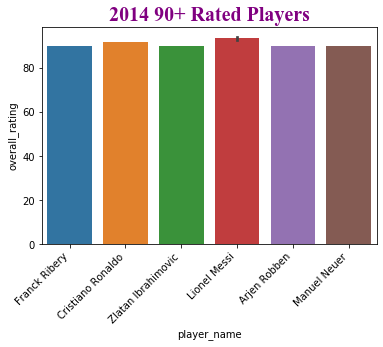

In [24]:
# Get 90+ Rated Players
high_rate = player_atts[player_atts.overall_rating>=90]
high_rate = pd.DataFrame(high_rate[["player_name", "overall_rating"]]).drop_duplicates()

# Plot 90+ Rated Players
barplot = sns.barplot(data = high_rate, x="player_name", y = "overall_rating")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 90+ Rated Players", fontname ='Times New Roman', size = 20, color ='purple')
None #don't show the label objects

high_rate

$Observation$
- We see that Lionel Messi was the highest rated Player in 2014, with a rating of $94$.

>> ### 3.4.2 Which Players Were the Fastest Sprinters in 2014 $\implies$ $94+$ Pace?

player_name  sprint_speed
454                 Theo Walcott          96.0
1424           Cristiano Ronaldo          94.0
1769                Mathis Bolly          97.0
2689                Ryo Miyaichi          94.0
3092                 Edwin Gyasi          94.0
3296           Jonathan Biabiany          94.0
3319               Juan Cuadrado          94.0
3547               Mohamed Salah          94.0
3628   Pierre-Emerick Aubameyang          95.0
3825               Victor Ibarbo          94.0
7770                 Gareth Bale          94.0
11306              Ignazio Abate          94.0
19640       Dzikamai Andre Gwaze          94.0
20113                Gareth Bale          95.0
20899       Joffre David Guerron          94.0
23630             Seydou Doumbia          94.0
24170              Victor Ibarbo          95.0

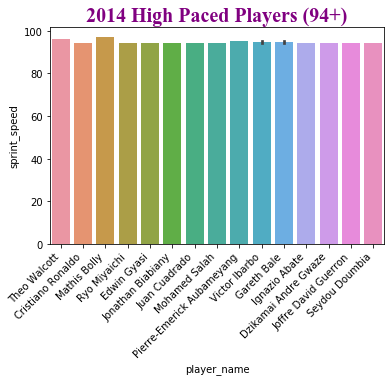

In [25]:
# Get 94+ Paced Players
high_pace = player_atts[player_atts.sprint_speed>=94]
high_pace = pd.DataFrame(high_pace[["player_name", "sprint_speed"]]).drop_duplicates()

# Plot 90+ Paced Players
pace_barplot = sns.barplot(data = high_pace, x="player_name", y = "sprint_speed")
pace_barplot.set_xticklabels(pace_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 High Paced Players (94+)", fontname ='Times New Roman', size = 20, color ='purple')
None #don't show the label objects

high_pace

$Observation$
- Mathis Bolly was the fastest player in 2014.

>> ### 3.4.3 Which Players Were Prolific Penalty Takers in 2014 $\implies$ $90+$ Penalty Kick Rating?

In [26]:
high_penalty = player_atts[player_atts.penalties>=90]
high_penalty = high_penalty[["player_name", "penalties"]]
high_penalty = pd.DataFrame(high_penalty)
high_penalty = high_penalty.drop_duplicates()
high_penalty = high_penalty.sort_values(by="penalties", ascending="True")
high_penalty.style.set_table_attributes("style='display:inline'").set_caption('94+ Sprint Speed Players in 2014')
high_penalty

player_name  penalties
397            Ryan Giggs       90.0
747       Francesco Totti       90.0
2291          Filip Daems       90.0
5098   Zlatan Ibrahimovic       91.0
2222          David Villa       92.0
21929     Mario Balotelli       92.0
7247      Mario Balotelli       93.0
4863       Rickie Lambert       94.0
2527      Mario Balotelli       95.0
12715      Rickie Lambert       95.0

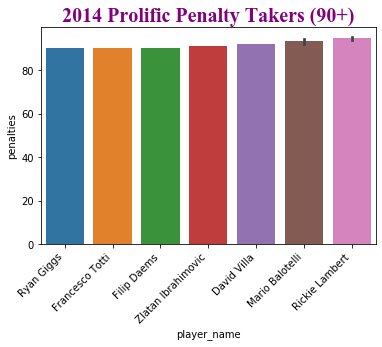

In [27]:
barplot = sns.barplot(data = high_penalty, x="player_name", y = "penalties")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Prolific Penalty Takers (90+)", fontname ='Times New Roman', size = 20, color ='purple')
None #don't show the label objects

$Observation$ 
- Mario Balotelli and Rickie Lambert highest rated penalty takers in 2014.

>> ### 3.4.4 Top Crossers, Finishers, Shot-Power, Sharp Headers, Dribblers, Reactive, Free Kick and Stamina Players

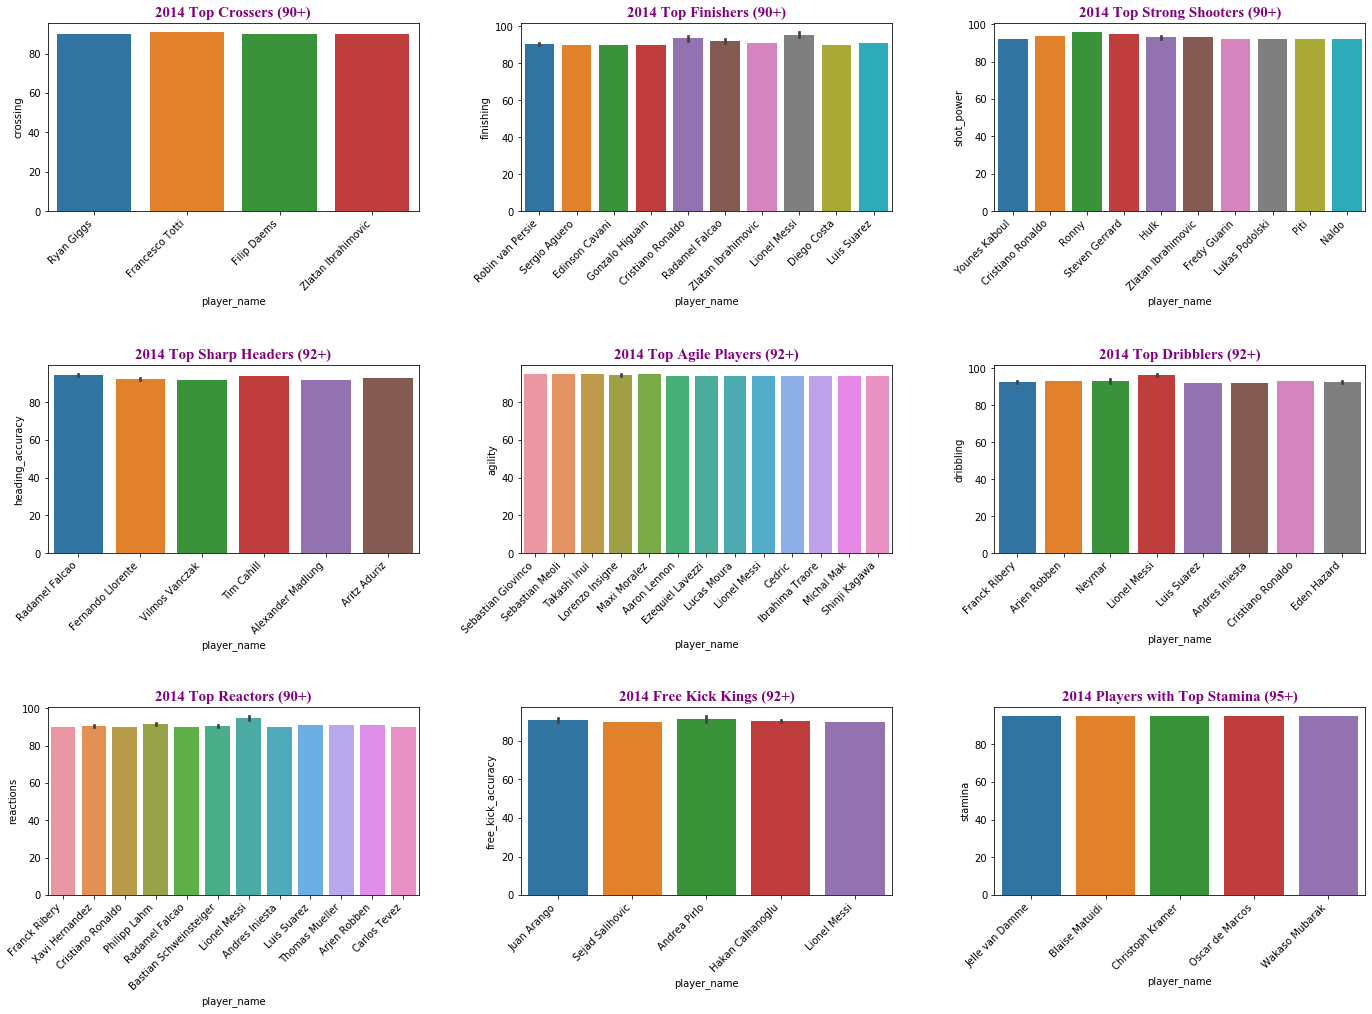

In [28]:
plt.figure(figsize=(20, 15))
# Crossing
crossing = player_atts[player_atts.crossing>=90]
crossing = pd.DataFrame(crossing[["player_name", "crossing"]]).drop_duplicates()
## Plot
plt.subplot(3, 3, 1)
crossing_barplot = sns.barplot(data = crossing, x="player_name", y = "crossing")
crossing_barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Top Crossers (90+)", fontname ='Times New Roman', size = 15, color ='purple')
None #don't show the label objects

# Finishing
finishing = player_atts[player_atts.finishing>=90]
finishing = pd.DataFrame(finishing[["player_name", "finishing"]]).drop_duplicates()
## Plot
plt.subplot(3,3,2)
finishing_barplot = sns.barplot(data = finishing, x="player_name", y = "finishing")
finishing_barplot.set_xticklabels(finishing_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Top Finishers (90+)", fontname ='Times New Roman', size = 15, color ='purple')

# Shot Power
shot_power = player_atts[player_atts.shot_power>=92]
shot_power = pd.DataFrame(shot_power[["player_name", "shot_power"]]).drop_duplicates()
## Plot
plt.subplot(3,3,3)
shot_power_barplot = sns.barplot(data = shot_power, x="player_name", y = "shot_power")
shot_power_barplot.set_xticklabels(shot_power_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Top Strong Shooters (90+)", fontname ='Times New Roman', size = 15, color ='purple')

# Heading Accuracy
header = player_atts[player_atts.heading_accuracy>=92]
header = pd.DataFrame(header[["player_name", "heading_accuracy"]]).drop_duplicates()
## Plot
plt.subplot(3,3,4)
header_barplot = sns.barplot(data = header, x="player_name", y = "heading_accuracy")
header_barplot.set_xticklabels(header_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Top Sharp Headers (92+)", fontname ='Times New Roman', size = 15, color ='purple')

# Agility
agility = player_atts[player_atts.agility>=94]
agility = pd.DataFrame(agility[["player_name", "agility"]]).drop_duplicates()
## Plot
plt.subplot(3,3,5)
agility_barplot = sns.barplot(data = agility, x="player_name", y = "agility")
agility_barplot.set_xticklabels(agility_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Top Agile Players (92+)", fontname ='Times New Roman', size = 15, color ='purple')

# Dribbling
dribbling = player_atts[player_atts.dribbling>=92]
dribbling = pd.DataFrame(dribbling[["player_name", "dribbling"]]).drop_duplicates()
## Plot
plt.subplot(3,3,6)
dribbling_barplot = sns.barplot(data = dribbling, x="player_name", y = "dribbling")
dribbling_barplot.set_xticklabels(dribbling_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Top Dribblers (92+)", fontname ='Times New Roman', size = 15, color ='purple')

# Reactions
reactions = player_atts[player_atts.reactions>=90]
reactions = pd.DataFrame(reactions[["player_name", "reactions"]]).drop_duplicates()
## Plot
plt.subplot(3,3,7)
reactions_barplot = sns.barplot(data = reactions, x="player_name", y = "reactions")
reactions_barplot.set_xticklabels(reactions_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Top Reactors (90+)", fontname ='Times New Roman', size = 15, color ='purple')

print("\t")
# Free_kick Accuracy
free_kick_accuracy = player_atts[player_atts.free_kick_accuracy>=90]
free_kick_accuracy = pd.DataFrame(free_kick_accuracy[["player_name", "free_kick_accuracy"]]).drop_duplicates()
## Plot
plt.subplot(3,3,8)
free_kick_accuracy_barplot = sns.barplot(data = free_kick_accuracy, x="player_name", y = "free_kick_accuracy")
free_kick_accuracy_barplot.set_xticklabels(free_kick_accuracy_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Free Kick Kings (92+)", fontname ='Times New Roman', size = 15, color ='purple')


# Stamina 
stamina = player_atts[player_atts.stamina>=95]
stamina = pd.DataFrame(stamina[["player_name", "stamina"]]).drop_duplicates()
## Plot
plt.subplot(3,3,9)
stamina_barplot = sns.barplot(data = stamina, x="player_name", y = "stamina")
stamina_barplot.set_xticklabels(stamina_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Players with Top Stamina (95+)", fontname ='Times New Roman', size = 15, color ='purple')
#plt.annotate()

#plt.figure(figsize=(20, 15))
plt.tight_layout(pad=4.0)

> ## 3.5 Numerical Data Analysis
Numerical data is a type of data that is expressed in terms of numbers rather than natural language descriptions. Similar to its name, numerical, it can only be collected in number form. Also known as quantitative data, this numerical data type can be used as a form of measurement.
>> ### 3.5.1 Extracting Numerical Data

In [29]:
# get Numerical Data
numerical = player_atts.select_dtypes(exclude=["object"]).columns
df_num = player_atts[numerical]
df_num.head()

overall_rating  height  crossing  finishing  shot_power  heading_accuracy  \
0            67.0  175.26      65.0       41.0        66.0              58.0   
1            73.0  180.34      64.0       70.0        79.0              61.0   
2            79.0  172.72      75.0       70.0        68.0              67.0   
3            63.0  177.80      39.0       67.0        61.0              57.0   
4            62.0  170.18      63.0       51.0        65.0              52.0   

   sprint_speed  agility  dribbling  reactions  free_kick_accuracy  stamina  \
0          75.0     69.0       69.0       69.0                66.0     77.0   
1          64.0     67.0       73.0       72.0                71.0     55.0   
2          76.0     84.0       84.0       73.0                66.0     80.0   
3          79.0     64.0       61.0       59.0                42.0     59.0   
4          85.0     73.0       61.0       42.0                33.0     70.0   

   penalties  
0       55.0  
1       72.0  
2       61.0  
3       66.0  
4       52.0

>> ### 3.5.2 Numerical Feature Correlation Analysis

In [30]:
numFeat = ['height', 'crossing', 'finishing', 'shot_power',
            'heading_accuracy', 'sprint_speed', 'agility', 
            'dribbling', 'reactions','free_kick_accuracy', 
            'stamina', 'penalties']

# check how the features are correlated with the overall ratings 
for f in numFeat:
    corr = player_atts['overall_rating'].corr(player_atts[f])
    print("%s: %f" % (f,corr))

height: 0.002632
crossing: 0.345298
finishing: 0.342379
shot_power: 0.418087
heading_accuracy: 0.293389
sprint_speed: 0.190392
agility: 0.242399
dribbling: 0.353318
reactions: 0.803711
free_kick_accuracy: 0.366815
stamina: 0.244433
penalties: 0.361797


### $Analysis$ 
- We see that there is not significant correlation to overall rating as one would have thought.

In [32]:
# Covert Date Column to actual date format
player_atts['date'] = pd.to_datetime(player_atts['date'])

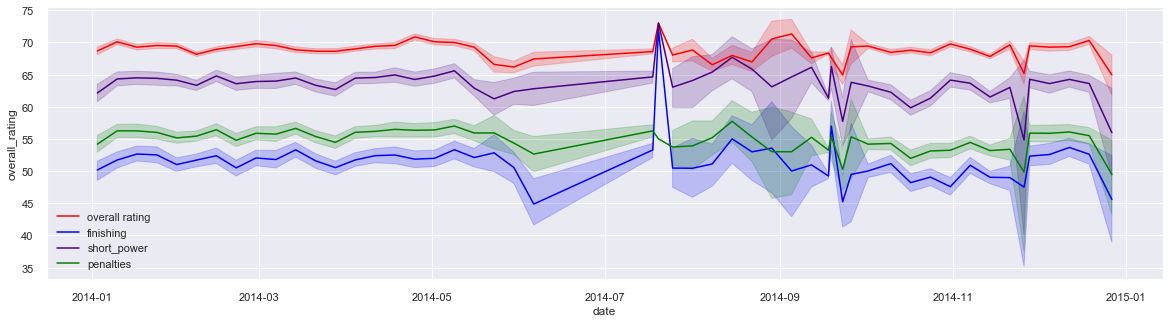

In [101]:
# Apply the default theme
sns.set()
plt.figure(figsize=(20, 5))
sns.lineplot(player_atts['date'],
             player_atts['overall_rating'], 
             color='red', label ="overall rating")

sns.lineplot(x=player_atts['date'],
             y=player_atts['finishing'], 
             color='blue', label ='finishing')

sns.lineplot(x=player_atts['date'],
             y=player_atts['shot_power'], 
             color='indigo', label = 'short_power')

sns.lineplot(x=player_atts['date'],
             y=player_atts['penalties'], 
             color='green', label = 'penalties')


>> ### 3.5.3 Multivariate Pair Plots

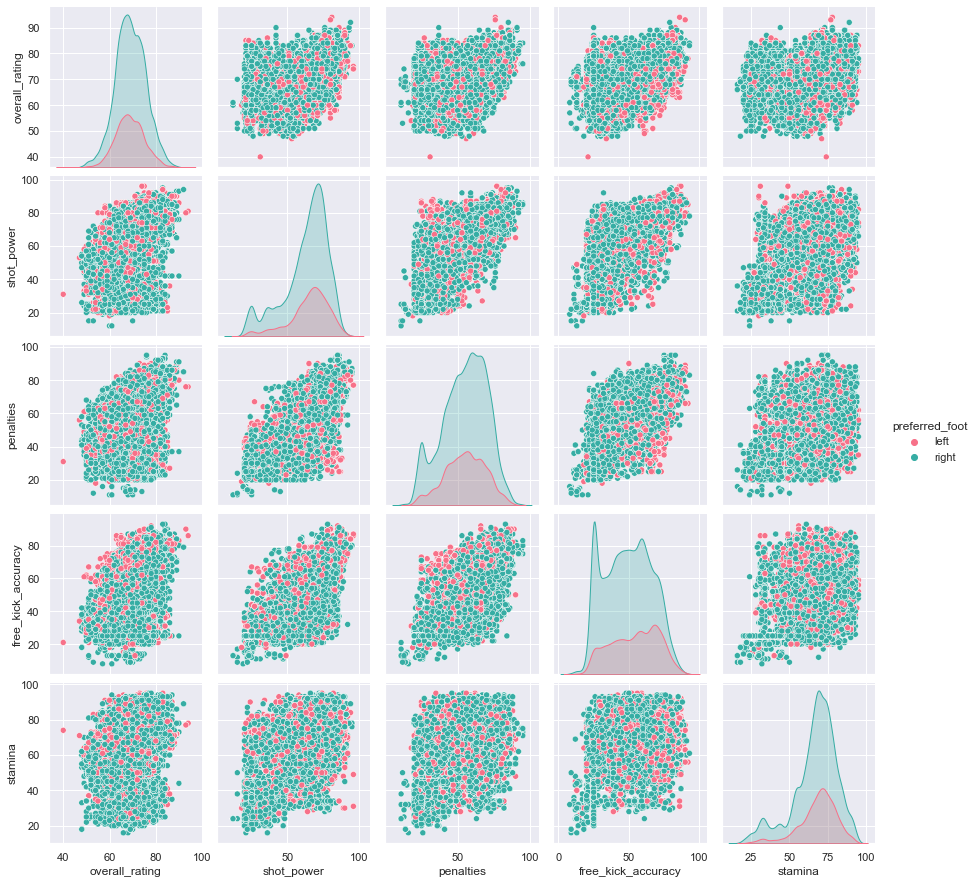

In [34]:
# pairplot without hue the car length, width and height
auto_dims = sns.pairplot(player_atts[['overall_rating', 'preferred_foot', 'shot_power', 'penalties', 'free_kick_accuracy', 
            'stamina']], hue="preferred_foot", hue_order=None, palette='husl')
                         
# to show
plt.show()

> ## 3.6 Categorical Data Analysis and Further Analysis
>> ### 3.6.1 Extracting Categorical Data

In [35]:
# get Categorical Data
categorical = player_atts.select_dtypes(include=["object"]).columns
df_cat = player_atts[categorical]
df_cat.head()

player_name             birthday attacking_work_rate defensive_work_rate  \
0  Aaron Meijers  1987-10-28 00:00:00              medium              medium   
1  Achille Emana  1982-06-05 00:00:00              medium                 low   
2   Adam Lallana  1988-05-10 00:00:00                high              medium   
3    Adam Morgan  1994-04-21 00:00:00              medium              medium   
4   Adama Traore  1990-02-03 00:00:00                high              medium   

  preferred_foot  
0           left  
1          right  
2          right  
3           left  
4           left

>> ### 3.6.2 How many Players were left-footed and Right-footed?

In [36]:
preferred_foot = pd.DataFrame(player_atts['preferred_foot'].value_counts())
preferred_foot

preferred_foot
right           24763
left             8029

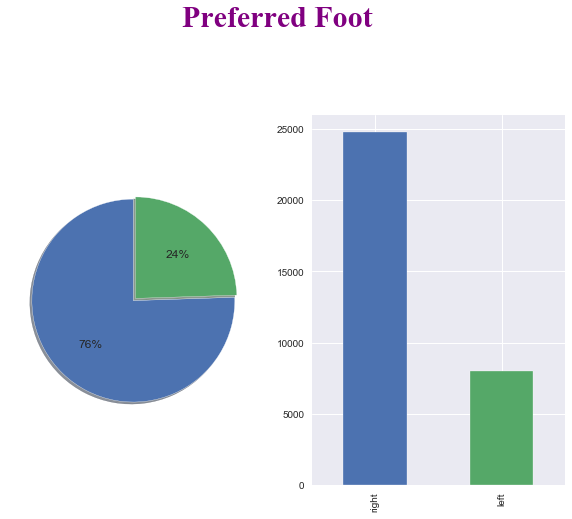

In [37]:
# Set figure size
plt.style.use('seaborn')
plt.figure(figsize=(10,15))
plt.tight_layout()

#Set Plot Title for both subplots
plt.suptitle("Preferred Foot", fontname ='Times New Roman', size = 30, color ='purple')

# Pie Chart
plt.subplot(2,2,1)
explode = (0.01, 0.02)
pie = plt.pie(player_atts["preferred_foot"].value_counts(),
              autopct='%1.0f%%', 
              explode=explode, 
              startangle=90, 
              shadow=True, 
              wedgeprops={'edgecolor': 'white'})

# Count /Bar Plots
plt.subplot(2,2,2)
my_colors = 'bg'  # blue,green.
bar = player_atts['preferred_foot'].value_counts().plot(kind='bar', color=list(my_colors))
plt.show()

$Observation$
- <font color='red'>$\implies$</font>$76$% of players in 2014 and 2015 were right-footed while $24$% are left-footed.

>> ### 3.6.3 Who was the Tallest Player in 2014?

In [38]:
# Extract Player Name and Height columns
player_height = player_atts[["player_name", "height"]]

# Who was the tallest player?
player_height[player_height.height == player_height.height.max()]

player_name  height
271  Kristof van Hout  208.28

$Observation$
- **Kristof van Hout** was the tallest player, standing at $2.1$ meters. 

>> ### 3.6.4 Who was the Oldest Player in 2014?

In [39]:
# Surpres warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = 'warn'
# Extract Player Name and birthday
player_age = player_atts[["player_name", "birthday"]]

# Covert Birthday Column to date format
player_age['birthday'] = pd.to_datetime(player_age['birthday'])

# Generating age
then = pd.Timestamp('2014') # set year to 2014
player_age['birthday'] = player_age['birthday'].where(player_age['birthday'] < then, player_age['birthday'] -  np.timedelta64(100, 'Y'))   # 2
player_age['age'] = (then - player_age['birthday']).astype('<m8[Y]')
 
# Check if the above worked
player_age.head()

player_name   birthday   age
0  Aaron Meijers 1987-10-28  26.0
1  Achille Emana 1982-06-05  31.0
2   Adam Lallana 1988-05-10  25.0
3    Adam Morgan 1994-04-21  19.0
4   Adama Traore 1990-02-03  23.0

In [40]:
# Now get the olders pplayer in 2014
# Who was the oldest player in 2014?
player_age[player_age.age == player_age.age.max()].drop_duplicates()

player_name   birthday   age
583  Brad Friedel 1971-05-18  42.0

$Observation$
- **Brad Friedel** was the oldest player in $2014$. 

>> ### 3.6.5 Who were the youngest players in 2014?


In [72]:
# Who was the youngest player in 2014?
player_age[player_age.age == player_age.age.min()].drop_duplicates()

player_name   birthday   age
2332            Greg Kiltie 1997-01-18  16.0
5110         Adam Armstrong 1997-02-10  16.0
7296          Michal Walski 1997-02-27  16.0
7680        Daniel De Silva 1997-03-06  16.0
8057        Patrick Roberts 1997-02-05  16.0
8271    Allan Saint-Maximin 1997-03-12  16.0
8437         Dawid Kownacki 1997-03-14  16.0
9038           Albian Ajeti 1997-02-26  16.0
9139           Breel Embolo 1997-02-14  16.0
14015                Malcom 1997-02-26  16.0
14764         Manuel Benson 1997-03-28  16.0
15671       Youri Tielemans 1997-05-07  16.0
18099          Adrian Marin 1997-01-09  16.0
18578      Arno Verschueren 1997-04-08  16.0
18667  Bartlomiej Dragowski 1997-08-19  16.0
18748      Bilal Ould-Chikh 1997-07-28  16.0
19129         Craig Wighton 1997-07-27  16.0
19755             Enes Unal 1997-05-10  16.0
20522          Isaiah Brown 1997-01-07  16.0
20772          Jeremie Boga 1997-01-03  16.0
21088          Joseph Gomez 1997-05-23  16.0
21251       Karol Swiderski 1997-01-23  16.0
22082      Mateusz Wieteska 1997-02-11  16.0
22309      Michal Bartowiak 1997-02-03  16.0
22631        Nicolo Barella 1997-02-07  16.0
22871           Paulin Puel 1997-05-09  16.0
23299    Rolando Mandragora 1997-06-29  16.0
23367           Ruben Neves 1997-03-13  16.0
23520          Scott Wright 1997-08-08  16.0
23648             Sheyi Ojo 1997-06-19  16.0
24517       Paul Bernardoni 1997-04-18  16.0
25783       Adam Ryczkowski 1997-04-30  16.0
26142            Jorge Mere 1997-04-17  16.0
27420       Dominic Solanke 1997-09-14  16.0
27556   Jean-Kevin Augustin 1997-06-16  16.0
32789            David Syme 1997-06-23  16.0
32790       Hidde ter Avest 1997-05-20  16.0
32800     Paul Andre Guerin 1997-09-26  16.0

$Observation$
- We get a whooping 38 young players in 2014.


>> ### 3.6.6 Age Distribution in 2014

Average age of Players in 2014 was 25.0


<Figure size 144x1080 with 0 Axes>

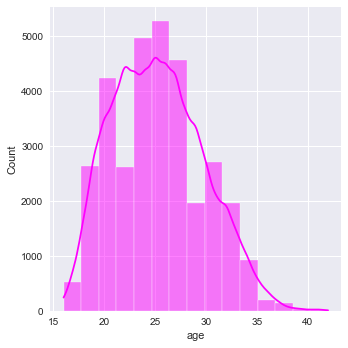

In [85]:
plt.figure(figsize = (2,15))
sns.displot(data=player_age, x="age", kde=True, bins=15, color='magenta')
print("Average age of Players in 2014 was", round(player_age.age.mean(),0))

$Observation$
- We see that most players were around the age of 25. 

>> ### 3.6.7 Attack-Minded Players

In [77]:
df_cat.head(1)

player_name             birthday attacking_work_rate defensive_work_rate  \
0  Aaron Meijers  1987-10-28 00:00:00              medium              medium   

  preferred_foot  
0           left

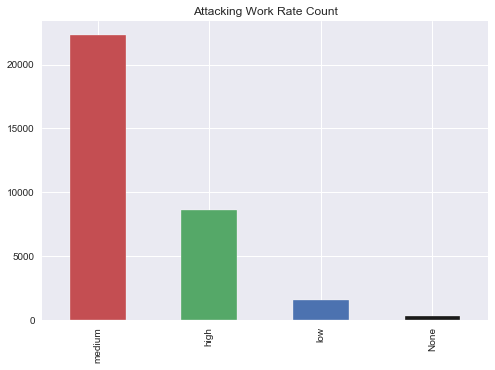

In [100]:
awr = pd.DataFrame(player_atts['attacking_work_rate'].value_counts())
awr
# Plot Workrate Distribution
my_colors = 'rgbkymc'  # blue,green.
ax = player_atts['attacking_work_rate'].value_counts().plot(kind='bar', color=list(my_colors), title = "Attacking Work Rate Count")
plt.show()

---
---
# <center>4. Manchester United vs. Manchester City</center>

Let's see how the mighty Manchester teams fared from $2010$ to $2015$. 
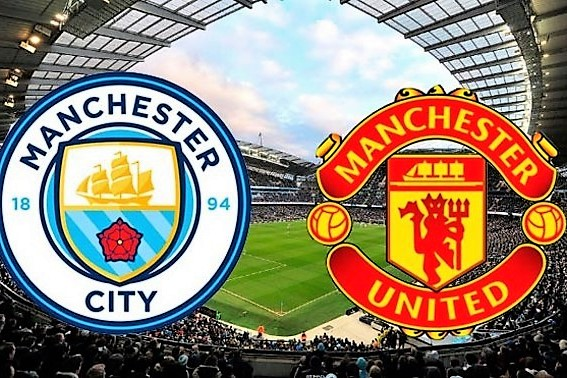

> ## 4.1 A look at `Team`  Table

In [105]:
# Show All Columns
pd.set_option('display.max_columns', None)
# Take a look at Team Dataframe
Team.head()

id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB

> ## 4.2 A look at `Team_Attributes`  Table

In [315]:
# Take a look at Team_Attributes Dataframe
Team_Attributes.head(3)

id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   
2              Balanced                  41.0                    Normal   

   buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  \
0                  50                   Mixed                   Organised   
1                  56                   Mixed                   Organised   
2                  54                   Mixed                   Organised   

   chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing  \
0                     60                     Normal                      65   
1                     54                     Normal                      63   
2                     54                     Normal                      63   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                      55   
1                      Normal                      64   
2                      Normal                      64   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                      Normal                      Organised               50   
1                      Normal                      Organised               47   
2                      Normal                      Organised               47   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0               Medium                 55                  Press   
1               Medium                 44                  Press   
2               Medium                 44                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0                45                Normal                    Cover  
1                54                Normal                    Cover  
2                54                Normal                    Cover

> ## 4.3 Let's `LEFT JOIN` `Team` Table with `Team_Attributes` Table and check some entries.

In [191]:
teams = pd.read_sql("""SELECT * 
                                FROM Team
                                LEFT JOIN Team_Attributes
                                ON Team_Attributes.team_api_id = Team.team_api_id
                                """, database_connection)
# Check the first 3 entries
teams.head(3)

id  team_api_id  team_fifa_api_id team_long_name team_short_name     id  \
0   1         9987             673.0       KRC Genk             GEN  485.0   
1   1         9987             673.0       KRC Genk             GEN  486.0   
2   1         9987             673.0       KRC Genk             GEN  487.0   

   team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0             673.0       9987.0  2010-02-22 00:00:00              45.0   
1             673.0       9987.0  2011-02-22 00:00:00              66.0   
2             673.0       9987.0  2012-02-22 00:00:00              53.0   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                   NaN                    Little   
2              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  \
0                45.0                   Mixed                   Organised   
1                52.0                   Mixed                   Organised   
2                55.0                   Mixed                   Organised   

   chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing  \
0                   50.0                     Normal                    35.0   
1                   65.0                     Normal                    66.0   
2                   55.0                     Normal                    48.0   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                    60.0   
1                      Normal                    51.0   
2                      Normal                    56.0   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                      Normal                      Organised             70.0   
1                      Normal                      Organised             48.0   
2                      Normal                      Organised             47.0   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0                 High               65.0                  Press   
1               Medium               47.0                  Press   
2               Medium               45.0                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0              70.0                  Wide                    Cover  
1              54.0                Normal             Offside Trap  
2              55.0                Normal                    Cover

> ## 4.4 Let's select Manchester United and Manchester City
- Since we want to dig some insights into Manchester teams, let's go ahead and select only those teams.

In [214]:
# Select Manchester United and City
team_stats = teams[(teams["team_long_name"]== "Manchester United") | (teams["team_long_name"] == "Manchester City") ]

> ## 4.5 Clean the data

In [215]:
# Remove Duplicate Columns
team_stats = team_stats.loc[:,~team_stats.columns.duplicated()]

# Drop some columns
team_stats = team_stats.drop(["id", "team_api_id", "team_fifa_api_id","team_short_name"], axis=1)

# Select only numerical columns
team_stats_num = team_stats[["team_long_name", "date", "buildUpPlaySpeed", "buildUpPlayPassing", "chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting", "defencePressure", "defenceAggression", "defenceTeamWidth"]]

# Covert date Column to date format
team_stats_num['date'] = pd.to_datetime(team_stats_num['date'])

team_stats_num

team_long_name       date  buildUpPlaySpeed  buildUpPlayPassing  \
99   Manchester United 2010-02-22              70.0                45.0   
100  Manchester United 2011-02-22              65.0                40.0   
101  Manchester United 2012-02-22              46.0                54.0   
102  Manchester United 2013-09-20              46.0                38.0   
103  Manchester United 2014-09-19              46.0                54.0   
104  Manchester United 2015-09-10              38.0                44.0   
153    Manchester City 2010-02-22              70.0                60.0   
154    Manchester City 2011-02-22              70.0                60.0   
155    Manchester City 2012-02-22              45.0                55.0   
156    Manchester City 2013-09-20              36.0                34.0   
157    Manchester City 2014-09-19              59.0                29.0   
158    Manchester City 2015-09-10              59.0                29.0   

     chanceCreationPassing  chanceCreationCrossing  chanceCreationShooting  \
99                    45.0                    70.0                    65.0   
100                   65.0                    65.0                    70.0   
101                   46.0                    60.0                    55.0   
102                   46.0                    68.0                    37.0   
103                   49.0                    72.0                    56.0   
104                   49.0                    44.0                    40.0   
153                   55.0                    70.0                    70.0   
154                   70.0                    65.0                    75.0   
155                   40.0                    38.0                    48.0   
156                   39.0                    44.0                    38.0   
157                   32.0                    49.0                    62.0   
158                   38.0                    36.0                    24.0   

     defencePressure  defenceAggression  defenceTeamWidth  
99              40.0               50.0              40.0  
100             45.0               45.0              65.0  
101             40.0               50.0              56.0  
102             49.0               49.0              56.0  
103             42.0               41.0              56.0  
104             54.0               53.0              56.0  
153             45.0               55.0              45.0  
154             65.0               65.0              50.0  
155             50.0               60.0              54.0  
156             42.0               44.0              54.0  
157             42.0               44.0              54.0  
158             48.0               47.0              54.0

> ## 4.6 Select Only Manchester United From the above Data Frame

In [314]:
# Select Manchester United from the above dataframe
man_u = team_stats_num[(team_stats_num["team_long_name"]== "Manchester United")]
man_u

team_long_name       date  buildUpPlaySpeed  buildUpPlayPassing  \
99   Manchester United 2010-02-22              70.0                45.0   
100  Manchester United 2011-02-22              65.0                40.0   
101  Manchester United 2012-02-22              46.0                54.0   
102  Manchester United 2013-09-20              46.0                38.0   
103  Manchester United 2014-09-19              46.0                54.0   
104  Manchester United 2015-09-10              38.0                44.0   

     chanceCreationPassing  chanceCreationCrossing  chanceCreationShooting  \
99                    45.0                    70.0                    65.0   
100                   65.0                    65.0                    70.0   
101                   46.0                    60.0                    55.0   
102                   46.0                    68.0                    37.0   
103                   49.0                    72.0                    56.0   
104                   49.0                    44.0                    40.0   

     defencePressure  defenceAggression  defenceTeamWidth  
99              40.0               50.0              40.0  
100             45.0               45.0              65.0  
101             40.0               50.0              56.0  
102             49.0               49.0              56.0  
103             42.0               41.0              56.0  
104             54.0               53.0              56.0

> ## 4.7 Select Only Manchester City From the above Data Frame

In [316]:
# Select Manchester City from the above dataframe
man_city = team_stats_num[(team_stats_num["team_long_name"]== "Manchester City")]
man_city

team_long_name       date  buildUpPlaySpeed  buildUpPlayPassing  \
153  Manchester City 2010-02-22              70.0                60.0   
154  Manchester City 2011-02-22              70.0                60.0   
155  Manchester City 2012-02-22              45.0                55.0   
156  Manchester City 2013-09-20              36.0                34.0   
157  Manchester City 2014-09-19              59.0                29.0   
158  Manchester City 2015-09-10              59.0                29.0   

     chanceCreationPassing  chanceCreationCrossing  chanceCreationShooting  \
153                   55.0                    70.0                    70.0   
154                   70.0                    65.0                    75.0   
155                   40.0                    38.0                    48.0   
156                   39.0                    44.0                    38.0   
157                   32.0                    49.0                    62.0   
158                   38.0                    36.0                    24.0   

     defencePressure  defenceAggression  defenceTeamWidth  
153             45.0               55.0              45.0  
154             65.0               65.0              50.0  
155             50.0               60.0              54.0  
156             42.0               44.0              54.0  
157             42.0               44.0              54.0  
158             48.0               47.0              54.0

> ## 4.8 Put the dataframes side by side and Display their Graphs
>> ### 4.8.1 Play Buildup Speed from $2010$ to $2015$

Manchester United date buildUpPlaySpeed 
 
 99 
 2010-02-22 00:00:00 
 70.000000 
 
 
 100 
 2011-02-22 00:00:00 
 65.000000 
 
 
 101 
 2012-02-22 00:00:00 
 46.000000 
 
 
 102 
 2013-09-20 00:00:00 
 46.000000 
 
 
 103 
 2014-09-19 00:00:00 
 46.000000 
 
 
 104 
 2015-09-10 00:00:00 
 38.000000 
 
 Manchester City buildUpPlaySpeed 
 
 153 
 70.000000 
 
 
 154 
 70.000000 
 
 
 155 
 45.000000 
 
 
 156 
 36.000000 
 
 
 157 
 59.000000 
 
 
 158 
 59.000000

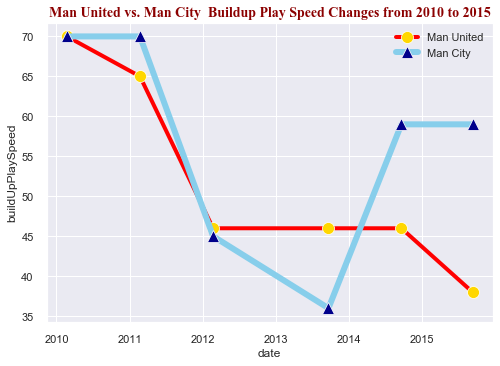

In [339]:
# Import display_html
from IPython.display import display_html 

# Man U Table
man_u_styler = man_u[["date", "buildUpPlaySpeed"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester United')

# Man City Table
man_city_styler = man_city[["buildUpPlaySpeed"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester City')

# Output the tables
display_html(man_u_styler._repr_html_()+man_city_styler._repr_html_(), raw=True)

#Graph Build Up Play Speed
sns.lineplot(x='date', y='buildUpPlaySpeed', data=man_u, marker='o', markerfacecolor="gold", markersize=12, color='red', linewidth=4, label='Man United').set_title("Man United vs. Man City  Buildup Play Speed Changes from 2010 to 2015", fontname ='Times New Roman', size = 14, color ='Darkred' )
sns.lineplot(x='date', y='buildUpPlaySpeed', data=man_city, marker='^', markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=6, label='Man City')


### $Analysis$
- From the line plots above, we observe a decline in Play buildup speed for both teams from $2010$ to $2015$, generally. 
- Machester United style reamined steady between 2012 to late 2014, after which it continued to decline. Manchester City, however, say a sharp improvement in buildup play speed after continued decline from late 2011 to late 2013, after which they improved upto late 2014, then their play got stady after that.
- No team ever went back to their initial play speed in those six years.

>> ### 4.8.2 Play Buildup Passing from $2010$ to $2015$

Manchester United date buildUpPlayPassing 
 
 99 
 2010-02-22 00:00:00 
 45.000000 
 
 
 100 
 2011-02-22 00:00:00 
 40.000000 
 
 
 101 
 2012-02-22 00:00:00 
 54.000000 
 
 
 102 
 2013-09-20 00:00:00 
 38.000000 
 
 
 103 
 2014-09-19 00:00:00 
 54.000000 
 
 
 104 
 2015-09-10 00:00:00 
 44.000000 
 
 Manchester City buildUpPlayPassing 
 
 153 
 60.000000 
 
 
 154 
 60.000000 
 
 
 155 
 55.000000 
 
 
 156 
 34.000000 
 
 
 157 
 29.000000 
 
 
 158 
 29.000000

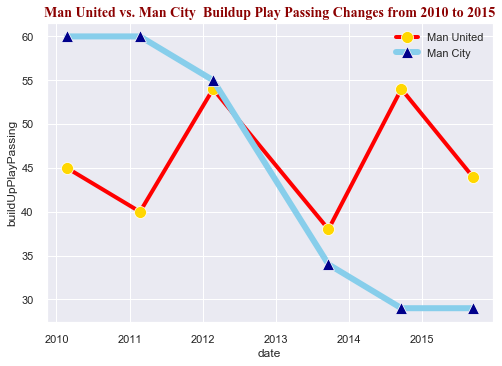

In [344]:
# Import display_html
from IPython.display import display_html 

# Man U Table
man_u_styler = man_u[["date", "buildUpPlayPassing"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester United')

# Man City Table
man_city_styler = man_city[["buildUpPlayPassing"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester City')

# Output the tables
display_html(man_u_styler._repr_html_()+man_city_styler._repr_html_(), raw=True)

#Graph Build Up Play Speed
sns.lineplot(x='date', y='buildUpPlayPassing', data=man_u, marker='o', markerfacecolor="gold", 
             markersize=12, color='red', linewidth=4, label='Man United').set_title("Man United vs. Man City  Buildup Play Passing Changes from 2010 to 2015", fontname ='Times New Roman', size = 14, color ='Darkred' )
sns.lineplot(x='date', y='buildUpPlayPassing', data=man_city, marker='^', markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=6, label='Man City')


### $Analysis$
- Manchester City's build up passing plummeted between $2010$ and $2015$, while that of Manchester United fluctuated year to year, improving from $2010$ to $2011$, then falling again before raising in the new season; by end of $2015$ season their build up play was tumbling down again.
- Generally, United improved their passing buildup.

>> ### 4.8.3 Passing Threat
- #### Chance Creation Passing from $2010$ to $2015$
- - What is it? This is making a pass that results in a shot; so we want to analyze which team was better at this between $2010$ and $2015$. 

Manchester United date chanceCreationPassing 
 
 99 
 2010-02-22 00:00:00 
 45.000000 
 
 
 100 
 2011-02-22 00:00:00 
 65.000000 
 
 
 101 
 2012-02-22 00:00:00 
 46.000000 
 
 
 102 
 2013-09-20 00:00:00 
 46.000000 
 
 
 103 
 2014-09-19 00:00:00 
 49.000000 
 
 
 104 
 2015-09-10 00:00:00 
 49.000000 
 
 Manchester City chanceCreationPassing 
 
 153 
 55.000000 
 
 
 154 
 70.000000 
 
 
 155 
 40.000000 
 
 
 156 
 39.000000 
 
 
 157 
 32.000000 
 
 
 158 
 38.000000

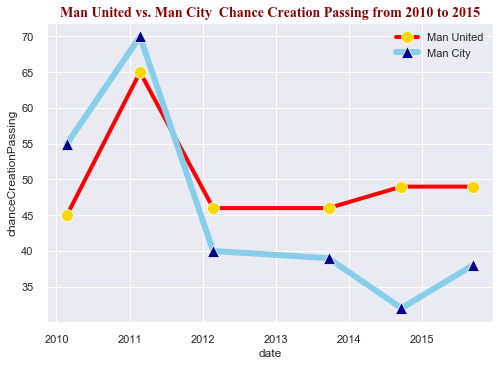

In [346]:
# Import display_html
from IPython.display import display_html 

# Man U Table
man_u_styler = man_u[["date", "chanceCreationPassing"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester United')

# Man City Table
man_city_styler = man_city[["chanceCreationPassing"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester City')

# Output the tables
display_html(man_u_styler._repr_html_()+man_city_styler._repr_html_(), raw=True)

#Graph Chance Creation Passing
sns.lineplot(x='date', y='chanceCreationPassing', data=man_u, marker='o', markerfacecolor="gold", markersize=12, color='red', linewidth=4, label='Man United').set_title("Man United vs. Man City  Chance Creation Passing from 2010 to 2015", fontname ='Times New Roman', size = 14, color ='Darkred' )
sns.lineplot(x='date', y='chanceCreationPassing', data=man_city, marker='^', markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=6, label='Man City')


### $Analysis$
- While Manchester City improved from $2010$ to $2011$, Manchester United's Passing lead to more threads than that of Manchester City in general.
- Both teams did poorly from $2012$ in creating more threatening passes.

>> ### 4.8.4 Crossing
- #### Chance Creation Crossing from $2010$ to $2015$

Manchester United date chanceCreationCrossing 
 
 99 
 2010-02-22 00:00:00 
 70.000000 
 
 
 100 
 2011-02-22 00:00:00 
 65.000000 
 
 
 101 
 2012-02-22 00:00:00 
 60.000000 
 
 
 102 
 2013-09-20 00:00:00 
 68.000000 
 
 
 103 
 2014-09-19 00:00:00 
 72.000000 
 
 
 104 
 2015-09-10 00:00:00 
 44.000000 
 
 Manchester City chanceCreationCrossing 
 
 153 
 70.000000 
 
 
 154 
 65.000000 
 
 
 155 
 38.000000 
 
 
 156 
 44.000000 
 
 
 157 
 49.000000 
 
 
 158 
 36.000000

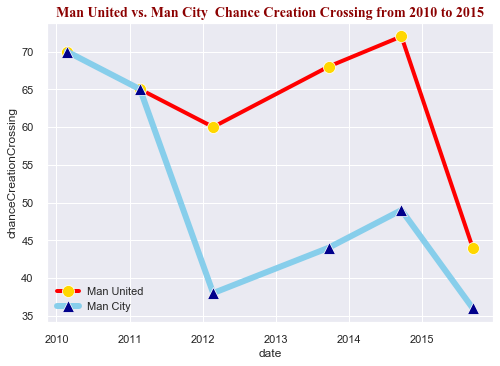

In [347]:
# Import display_html
from IPython.display import display_html 

# Man U Table
man_u_styler = man_u[["date", "chanceCreationCrossing"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester United')

# Man City Table
man_city_styler = man_city[["chanceCreationCrossing"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester City')

# Output the tables
display_html(man_u_styler._repr_html_()+man_city_styler._repr_html_(), raw=True)

#Graph Chance Creation Passing
sns.lineplot(x='date', y='chanceCreationCrossing', data=man_u, marker='o', markerfacecolor="gold", markersize=12, color='red', linewidth=4, label='Man United').set_title("Man United vs. Man City  Chance Creation Crossing from 2010 to 2015", fontname ='Times New Roman', size = 14, color ='Darkred' )
sns.lineplot(x='date', y='chanceCreationCrossing', data=man_city, marker='^', markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=6, label='Man City')


### $Analysis$
- By end of $2014$ Machester united was at its pinaccle with chances created from crosses.
- Machester City showed no significant signs of real threat from crosses.

>> ### 4.8.5 Shooting
- #### Chance Creation Shooting from $2010$ to $2015$


Manchester United date chanceCreationShooting 
 
 99 
 2010-02-22 00:00:00 
 65.000000 
 
 
 100 
 2011-02-22 00:00:00 
 70.000000 
 
 
 101 
 2012-02-22 00:00:00 
 55.000000 
 
 
 102 
 2013-09-20 00:00:00 
 37.000000 
 
 
 103 
 2014-09-19 00:00:00 
 56.000000 
 
 
 104 
 2015-09-10 00:00:00 
 40.000000 
 
 Manchester City chanceCreationShooting 
 
 153 
 70.000000 
 
 
 154 
 75.000000 
 
 
 155 
 48.000000 
 
 
 156 
 38.000000 
 
 
 157 
 62.000000 
 
 
 158 
 24.000000

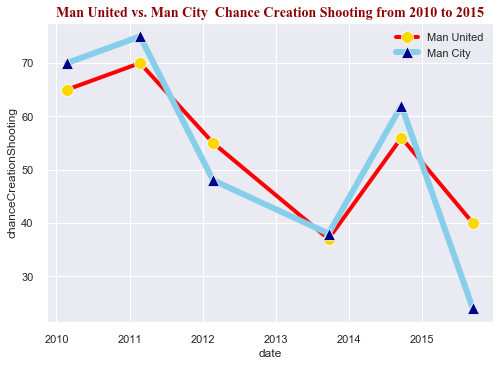

In [348]:
# Import display_html
from IPython.display import display_html 

# Man U Table
man_u_styler = man_u[["date", "chanceCreationShooting"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester United')

# Man City Table
man_city_styler = man_city[["chanceCreationShooting"]].style.set_table_attributes("style='display:inline'").set_caption('Manchester City')

# Output the tables
display_html(man_u_styler._repr_html_()+man_city_styler._repr_html_(), raw=True)

#Graph Chance Creation Passing
sns.lineplot(x='date', y='chanceCreationShooting', data=man_u, marker='o', markerfacecolor="gold", markersize=12, color='red', linewidth=4, label='Man United').set_title("Man United vs. Man City  Chance Creation Shooting from 2010 to 2015", fontname ='Times New Roman', size = 14, color ='Darkred' )
sns.lineplot(x='date', y='chanceCreationShooting', data=man_city, marker='^', markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=6, label='Man City')

### $Analysis$
- Both teams started off well going into $2011$, reaching $65$% and $70$% respectively
- But from $2011$ to $2014$ their shooting chances plummeted and never reached the level of $2011$ despite improvements, before yet another fall moving to the end of $2015$ season. 

> ## 4.9 `Group By` to get average of each feature over 6 years

In [219]:
# Groupby team name
team_stats_num.groupby("team_long_name").mean().round(1).T

team_long_name          Manchester City  Manchester United
buildUpPlaySpeed                   56.5               51.8
buildUpPlayPassing                 44.5               45.8
chanceCreationPassing              45.7               50.0
chanceCreationCrossing             50.3               63.2
chanceCreationShooting             52.8               53.8
defencePressure                    48.7               45.0
defenceAggression                  52.5               48.0
defenceTeamWidth                   51.8               54.8

### $Analysis$

The above 6-year averages for each feature give us an insight into each team, grouped by country.
- Manchester City's Average Buildup Play **Speed** was better than that of Machester United over the four years ($2010$ to $2015.$
- When it comes to Buildup Play **Passing**, Manchester United's $2010$ to $2015$ Average was better than that of Manchester City. 
- Manchester United created more average chances from their passing than Manchester City. 
- Again, Machester United was more prolific in creating Crossing chances, averaging $63.2$% to $50.2$% of Manchester City.
- Between $2010$ and $2015$, we see once again that Manchester United was just about $1$% better than Manchester City with creating shooting chances. 
- However, between $2010$ and $2015$, Machester City played a more pressure-focused and aggressive defensive game than Machester United. 
- Manchester United used a more widened defence technique between $2010$ and $2015$ than Manchester City. 


> ## 4.10 Manchester United Style of Play Statistics Visualization
>> ### 4.10.1 Multiple Line Plots

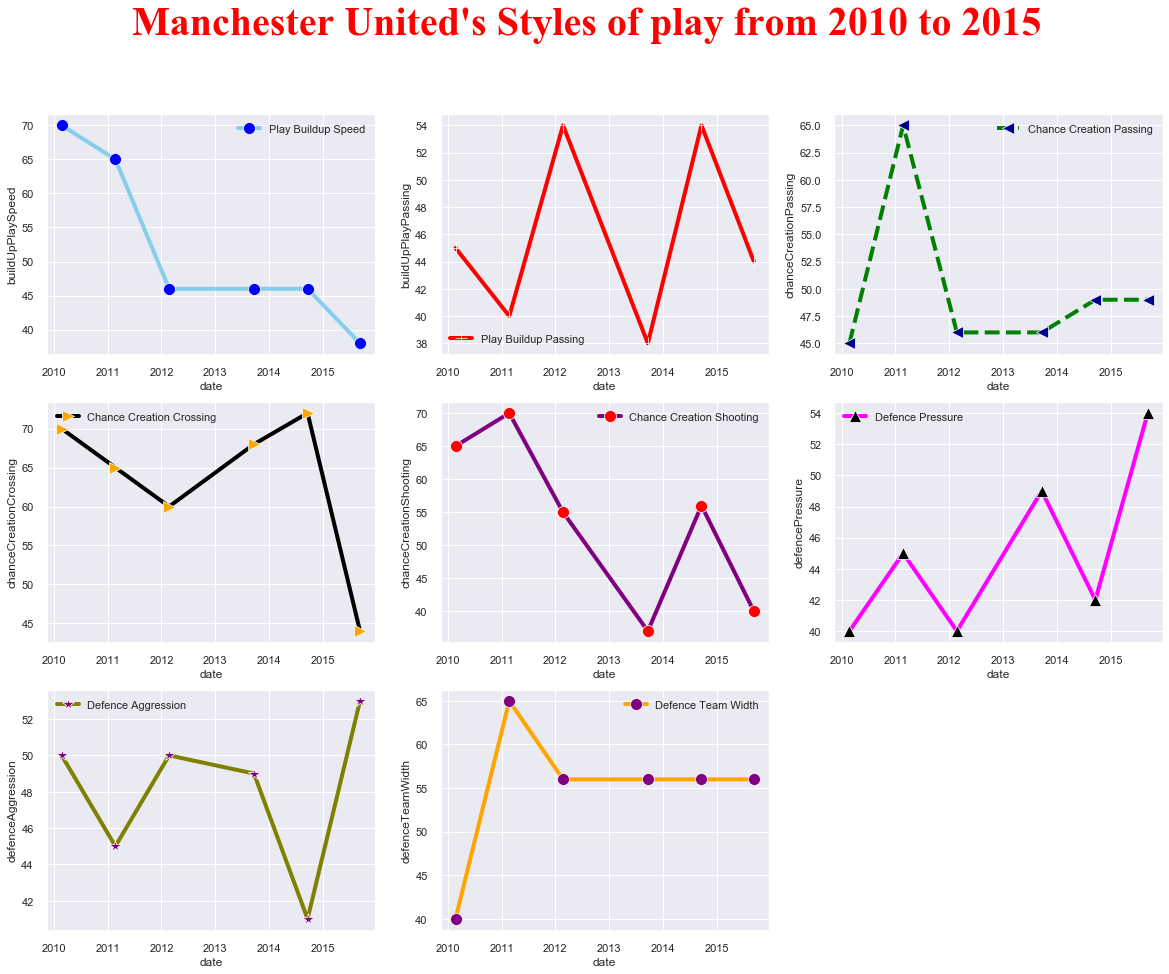

In [352]:
# Set figure size
plt.figure(figsize=(20, 15))
#Set Plot Title for all subplots
plt.suptitle("Manchester United's Styles of play from 2010 to 2015", fontname ='Times New Roman', size = 40, color ='red')

# Multiple Plots
# Play Buildup Play Speed Graph
plt.subplot(3,3,1)
sns.lineplot(x='date', y='buildUpPlaySpeed', data=man_u, marker='o', markerfacecolor="blue", markersize=12, color='skyblue', linewidth=4, label='Play Buildup Speed')
plt.subplot(3,3,2)
sns.lineplot(x='date', y='buildUpPlayPassing', data=man_u, marker='+', markerfacecolor="black", markersize=12, color='red', linewidth=4, label='Play Buildup Passing')
plt.subplot(3,3,3)
sns.lineplot(x='date', y='chanceCreationPassing', data=man_u, marker='<', markerfacecolor="darkblue", markersize=12, color='green', linewidth=4, label='Chance Creation Passing', linestyle='dashed')
plt.subplot(3,3,4)
sns.lineplot(x='date', y='chanceCreationCrossing', data=man_u, marker='>', markerfacecolor="orange", markersize=12, color='black', linewidth=4, label='Chance Creation Crossing', ci=None)
plt.subplot(3,3,5)
sns.lineplot(x='date', y='chanceCreationShooting', data=man_u, marker='o', markerfacecolor="red", markersize=12, color='purple', linewidth=4, label='Chance Creation Shooting', palette='deep')
plt.subplot(3,3,6)
sns.lineplot(x='date', y='defencePressure', data=man_u, marker='^', markerfacecolor="black", markersize=12, color='magenta', linewidth=4, label='Defence Pressure')
plt.subplot(3,3,7)
sns.lineplot(x='date', y='defenceAggression', data=man_u, marker='*', markerfacecolor="purple", markersize=12, color='olive', linewidth=4, label='Defence Aggression')
plt.subplot(3,3,8)
sns.lineplot(x='date', y='defenceTeamWidth', data=man_u, marker='o', markerfacecolor="purple", markersize=12, color='orange', linewidth=4, label='Defence Team Width')

> ## 4.11 Manchester City Style of Play Statistics Visualization
>> ### 4.11.1 Multiple Line Plots

Text(0.5, 1.0, 'Defence Team Width')

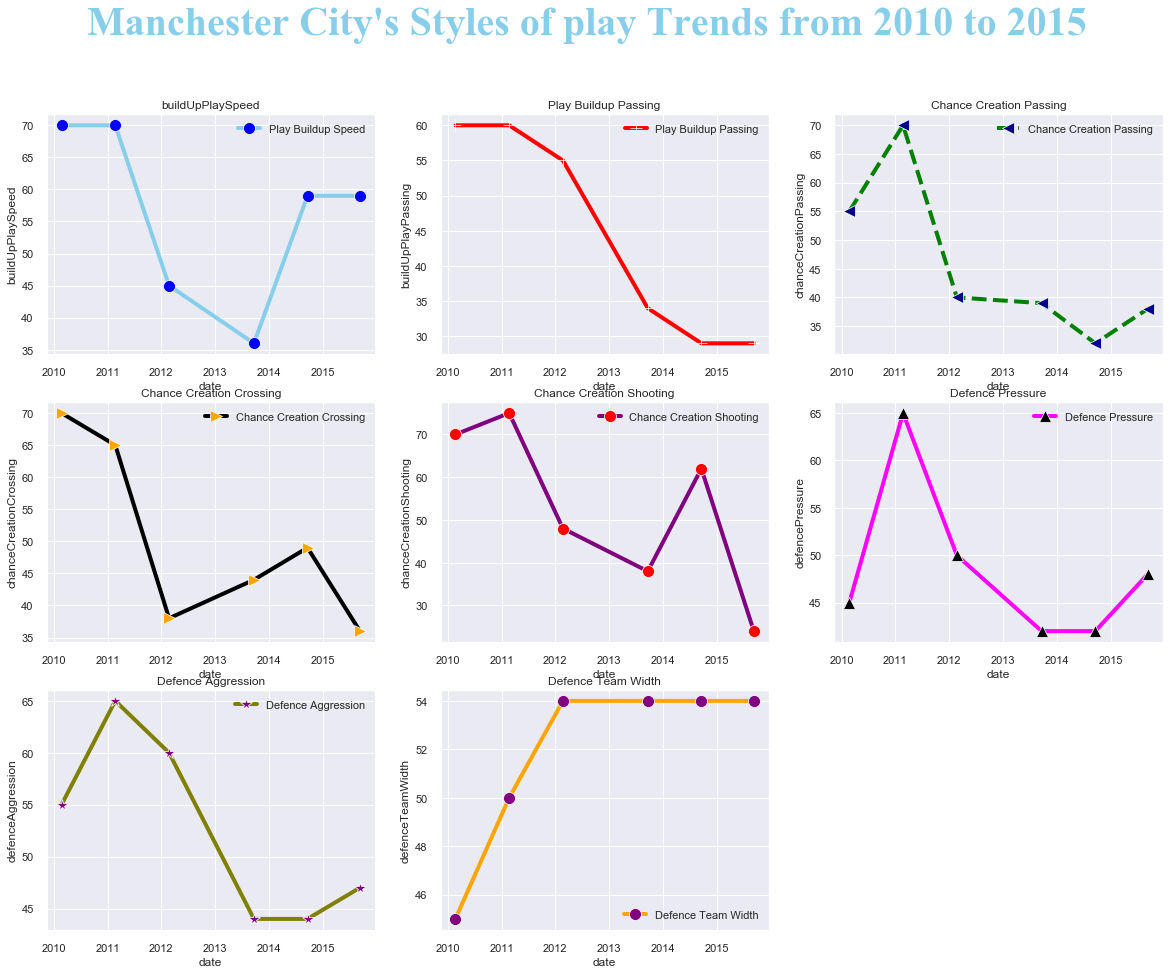

In [357]:
# Set figure size
plt.figure(figsize=(20, 15))
#Set Plot Title for all subplots
plt.suptitle("Manchester City's Styles of play Trends from 2010 to 2015", fontname ='Times New Roman', size = 40, color ='skyblue')
# Tight Layout
plt.tight_layout()
# Multiple Plots
# Play Buildup Play Speed Graph
plt.subplot(3,3,1)
sns.lineplot(x='date', y='buildUpPlaySpeed', data=man_city, marker='o', markerfacecolor="blue", markersize=12, color='skyblue', linewidth=4, label='Play Buildup Speed').set_title("buildUpPlaySpeed")
plt.subplot(3,3,2)
sns.lineplot(x='date', y='buildUpPlayPassing', data=man_city, marker='+', markerfacecolor="black", markersize=12, color='red', linewidth=4, label='Play Buildup Passing').set_title("Play Buildup Passing")
plt.subplot(3,3,3)
sns.lineplot(x='date', y='chanceCreationPassing', data=man_city, marker='<', markerfacecolor="darkblue", markersize=12, color='green', linewidth=4, label='Chance Creation Passing', linestyle='dashed').set_title("Chance Creation Passing")
plt.subplot(3,3,4)
sns.lineplot(x='date', y='chanceCreationCrossing', data=man_city, marker='>', markerfacecolor="orange", markersize=12, color='black', linewidth=4, label='Chance Creation Crossing', ci=None).set_title("Chance Creation Crossing")
plt.subplot(3,3,5)
sns.lineplot(x='date', y='chanceCreationShooting', data=man_city, marker='o', markerfacecolor="red", markersize=12, color='purple', linewidth=4, label='Chance Creation Shooting', palette='deep').set_title("Chance Creation Shooting")
plt.subplot(3,3,6)
sns.lineplot(x='date', y='defencePressure', data=man_city, marker='^', markerfacecolor="black", markersize=12, color='magenta', linewidth=4, label='Defence Pressure').set_title("Defence Pressure")
plt.subplot(3,3,7)
sns.lineplot(x='date', y='defenceAggression', data=man_city, marker='*', markerfacecolor="purple", markersize=12, color='olive', linewidth=4, label='Defence Aggression').set_title("Defence Aggression")
plt.subplot(3,3,8)
sns.lineplot(x='date', y='defenceTeamWidth', data=man_city, marker='o', markerfacecolor="purple", markersize=12, color='orange', linewidth=4, label='Defence Team Width').set_title("Defence Team Width")

# Tight Layout
#plt.tight_layout()

---
---
# <center>5. Matches & Goals Analysis</cemter>
> ## 5.1 Read SQL Tables

In [362]:
match_results = pd.read_sql("""SELECT Match.id, 
                                      Country.name  country_name,
                                      League.name  League_name,
                                      date, 
                                      season,
                                      Home_team.team_long_name  Home_team,
                                      away_team.team_long_name  away_team,
                                      home_team_goal,
                                      away_team_goal
                                      
                               FROM Country 
                               JOIN Match
                               ON Country.id=Match.Country_id
                               
                               JOIN League
                               ON Country.id=League.Country_id
                        
                               LEFT JOIN Team AS Home_team 
                               ON Home_team.team_api_id=Match.home_team_api_id
                        
                               LEFT JOIN Team AS away_team 
                               ON away_team.team_api_id=Match.away_team_api_id
                        
                            """, database_connection)
match_results.head(3)

id country_name             League_name                 date     season  \
0   1      Belgium  Belgium Jupiler League  2008-08-17 00:00:00  2008/2009   
1   2      Belgium  Belgium Jupiler League  2008-08-16 00:00:00  2008/2009   
2   3      Belgium  Belgium Jupiler League  2008-08-16 00:00:00  2008/2009   

           Home_team         away_team  home_team_goal  away_team_goal  
0           KRC Genk      Beerschot AC               1               1  
1   SV Zulte-Waregem  Sporting Lokeren               0               0  
2  KSV Cercle Brugge    RSC Anderlecht               0               3

> ## 5.2 Extract Manchester United and Manchester City's Results
>> ### 5.2.1 Machester United Matches

In [371]:
# Manchester United Home Games
manU_home = match_results[match_results["Home_team"] == "Manchester United"]

# Manchester United Away Games
manU_away = match_results[match_results["away_team"] == "Manchester United"]

manU_home["match_result"] = np.where(manU_home["home_team_goal"] > manU_home["away_team_goal"], 'win', 'lose')


manU_home['match_result'] = np.where(manU_home['home_team_goal'] == manU_home['away_team_goal'], 'draw', manU_home['match_result'])


manU_away['match_result'] = np.where(manU_away['home_team_goal'] < manU_away['away_team_goal'], 'win', 'lose')
manU_away['match_result'] = np.where(manU_away['home_team_goal'] == manU_away['away_team_goal'], 'draw', manU_away['match_result'])

MU = pd.concat([manU_home, manU_away])
MU.head()

id country_name             League_name                 date  \
1728  1729      England  England Premier League  2008-08-17 00:00:00   
1738  1739      England  England Premier League  2008-10-29 00:00:00   
1748  1749      England  England Premier League  2008-11-01 00:00:00   
1768  1769      England  England Premier League  2008-11-15 00:00:00   
1798  1799      England  England Premier League  2008-12-06 00:00:00   

         season          Home_team         away_team  home_team_goal  \
1728  2008/2009  Manchester United  Newcastle United               1   
1738  2008/2009  Manchester United   West Ham United               2   
1748  2008/2009  Manchester United         Hull City               4   
1768  2008/2009  Manchester United        Stoke City               5   
1798  2008/2009  Manchester United        Sunderland               1   

      away_team_goal match_result  
1728               1         draw  
1738               0          win  
1748               3          win  
1768               0          win  
1798               0          win

>> ### 5.2.2 Machester City Matches

In [372]:
# Manchester City Home Games
manC_home = match_results[match_results["Home_team"] == "Manchester City"]

# Manchester Away Away Games
manC_away = match_results[match_results["away_team"] == "Manchester City"]

manC_home["match_result"] = np.where(manC_home["home_team_goal"] > manC_home["away_team_goal"], 'win', 'lose')


manC_home['match_result'] = np.where(manC_home['home_team_goal'] == manC_home['away_team_goal'], 'draw', manC_home['match_result'])


manC_away['match_result'] = np.where(manC_away['home_team_goal'] < manC_away['away_team_goal'], 'win', 'lose')
manC_away['match_result'] = np.where(manC_away['home_team_goal'] == manC_away['away_team_goal'], 'draw', manC_away['match_result'])

MC = pd.concat([manC_home, manC_away])
MC.head()

id country_name             League_name                 date  \
1763  1764      England  England Premier League  2008-11-09 00:00:00   
1783  1784      England  England Premier League  2008-11-22 00:00:00   
1793  1794      England  England Premier League  2008-11-30 00:00:00   
1813  1814      England  England Premier League  2008-12-13 00:00:00   
1833  1834      England  England Premier League  2008-12-26 00:00:00   

         season        Home_team          away_team  home_team_goal  \
1763  2008/2009  Manchester City  Tottenham Hotspur               1   
1783  2008/2009  Manchester City            Arsenal               3   
1793  2008/2009  Manchester City  Manchester United               0   
1813  2008/2009  Manchester City            Everton               0   
1833  2008/2009  Manchester City          Hull City               5   

      away_team_goal match_result  
1763               2         lose  
1783               0          win  
1793               1         lose  
1813               1         lose  
1833               1          win

> ## 5.3 Match Results Analysis 
- We look at how many Draws, Wins and Loses Each team hard; we will make use of both visual aids and actual numbers to get a full picture.

>> ### 5.3.1 Count Plots
- Count plot is a graphical display to show the number of occurrences or frequency for each categorical data using bars.
- Here we will use count plots to diplay the number of `wins`, `loses` and `draws` for each team.

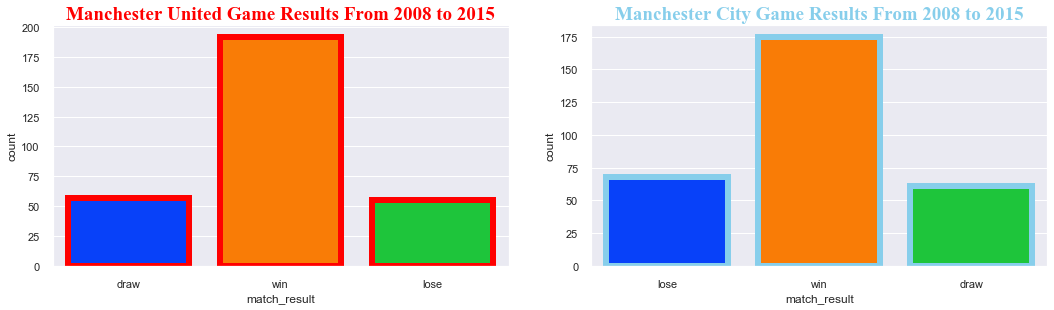

In [479]:
# Set figure size
plt.figure(figsize=(15, 8))
# Manchester United Game Results between 2008 and 2015
plt.subplot(2,2,1)
sns.countplot(x="match_result", data=MU, saturation=0.95, palette="bright", edgecolor="red",
                  linewidth=6).set_title("Manchester United Game Results From 2008 to 2015", fontsize=19, fontname ='Times New Roman', color ='red')

# Manchester City Game Results between 2008 and 2015
plt.subplot(2,2,2)
sns.countplot(x="match_result", data=MC, saturation=0.95, palette="bright", edgecolor="skyblue",
                  linewidth=6).set_title("Manchester City Game Results From 2008 to 2015", fontsize=19, fontname ='Times New Roman', color ='skyblue')
# Output figures Layout  
plt.tight_layout()

>> ### 5.3.2 $Analysis$: Numbers behind the count plots 
- Let's have actual numbers to tell us how many wins, loses and draws for each team, wheather home or away.


In [488]:
# Manchester United 
# Wins
MU_wins = MU[MU["match_result"] == "win"]["match_result"].count()
# Loses
MU_loses = MU[MU["match_result"] == "lose"]["match_result"].count()
# draws
MU_draws = MU[MU["match_result"] == "draw"]["match_result"].count()

# Manchester City 
# Wins
MC_wins = MC[MC["match_result"] == "win"]["match_result"].count()
# Loses
MC_loses = MC[MC["match_result"] == "lose"]["match_result"].count()
# draws
MC_draws = MC[MC["match_result"] == "draw"]["match_result"].count()
# print statements
# wins
print("Manchester United had", MU_wins, "wins between 2008 and 2015, while Manchester City had", MC_wins)
# loses
print("Manchester United had", MU_loses, "loses between 2008 and 2015, while Manchester City had", MC_loses)
# draws
print("Manchester United had", MU_draws, "draws between 2008 and 2015, while Manchester City had", MC_draws)


Manchester United had 192 wins between 2008 and 2015, while Manchester City had 175
Manchester United had 55 loses between 2008 and 2015, while Manchester City had 68
Manchester United had 57 draws between 2008 and 2015, while Manchester City had 61


- <font size=3)>So between $2008$ and $2015$, <font color='red'>Manchester United</font> had $192$ wins, $55$ loses and $57$ draws while <font color='skyblue'>Manchester City</font> had $175$ wins, $68$ loses and $61$ draws.</font>

- <font size=3)>Manchester United performed much better than Manchester City in that timeframe.</font>
-- 

---
> ## 5.4 Goals Analysis
- Now that we have seen wins, draws and loses for each team, let us dig deeper into the number of goals each scored while playing at home and away.
>> ### 5.4.1 Total Number of Goals scored from $2008$ to $2015$

In [516]:
# Goals Scored
MU_goals = MU["home_team_goal"].sum()
MC_goals = MC["home_team_goal"].sum()

# print statements
print("Manchester United scored", MU_goals,"\nManchester City Scored",MC_goals);

Manchester United scored 498 
Manchester City Scored 547


### $Analysis$
- Manchester City scored more goals ($547$) than Manchester United ($498$) between $2008$ and $2015$.
---
>> ### 5.4.2 Total Number of Goals conceded from $2008$ to $2015$

In [518]:
# Goals Conceded
MU_conc = MU["away_team_goal"].sum()
MC_conc = MC["away_team_goal"].sum()

# print statements
print("Manchester United conceded", MU_conc,"\nManchester City conceded",MC_conc);

Manchester United conceded 364 
Manchester City conceded 366


### $Analysis$
- Manchester City conceded 2 more goals ($366$) than Manchester United ($364$) between $2008$ and $2015$.
- While Manchester City scored more goals, they always conceded more goals, something that can be traced back to their defence techniques as we saw above.

>> ### 5.4.3 Total Number of Goals scored and conceded in a single game

In [536]:
# Maximum Goals
MU_max = MU[["home_team_goal", "away_team_goal"]].max()
MC_max = MC[["home_team_goal", "away_team_goal"]].max()
# max goals scored print statements
print("Maximum number of goals scored by Manchester United In a single match:",MU_max[0])
print("Maximum number of goals scored by Manchester City In a single match:",MC_max[0])

# max goals conceded print statements
print("\nMaximum number of goals conceded by Manchester United In a single match:",MU_max[1])
print("Maximum number of goals conceded by Manchester City In a single match:",MC_max[1])

Maximum number of goals scored by Manchester United In a single match: 8
Maximum number of goals scored by Manchester City In a single match: 7

Maximum number of goals conceded by Manchester United In a single match: 6
Maximum number of goals conceded by Manchester City In a single match: 6


---
> ## 5.5 Head-to-Head Analysis
- Now let us look at the Manchester Derby Results and goals analysis.
>> ### 5.5.1 Head-To-Head Dataframe

In [614]:
# Filter the Original MU dataframe
filtered = MU.filter(items=['date','Home_team','home_team_goal', 'away_team_goal', 'away_team','match_result'])

# Covert date Column to datetime format
filtered['date'] = pd.to_datetime(filtered['date'])

# Create a variable with TRUE if away team is Manchester City
city = filtered['away_team'] == "Manchester City"

# Create a variable where TRUE when Home team is Manchester United
united = filtered['Home_team'] == "Manchester United"

filtered = filtered[united & city]
filtered["match_result"]


date          Home_team  home_team_goal  away_team_goal  \
2018 2009-05-10  Manchester United               2               0   
2448 2009-09-20  Manchester United               4               3   
2678 2011-02-12  Manchester United               2               1   
3244 2011-10-23  Manchester United               1               6   
3500 2013-04-08  Manchester United               1               2   
3832 2014-03-25  Manchester United               0               3   
4260 2015-04-12  Manchester United               4               2   
4403 2015-10-25  Manchester United               0               0   

            away_team match_result  
2018  Manchester City          win  
2448  Manchester City          win  
2678  Manchester City          win  
3244  Manchester City         lose  
3500  Manchester City         lose  
3832  Manchester City         lose  
4260  Manchester City          win  
4403  Manchester City         draw

>> ### 5.5.2 Manchester Derby Results between $2008$ and $2015$
- Which team between Manchester United and Manchester City won more matches in the Manchester Derby?

In [635]:
print("Machester United game results against Manchester City:")
pd.DataFrame(filtered['match_result'].value_counts())

Machester United game results against Manchester City:


match_result
win              4
lose             3
draw             1

### $Analysis$
- Manchester United won 4 games, lost 3 games and drew 1 between $2008$ and $2015$ against Manchester City.
- Manchester United dominated the Manchester Derby between $2008$ and $2015$.
---
>> ### 5.5.3 Manchester Derby Highest Number of goals scored between $2008$ and $2015$

In [641]:
pd.DataFrame(filtered[['home_team_goal', 'away_team_goal']].max()).T

home_team_goal  away_team_goal
0               4               6

### $Analysis$
- Manchester City's highest derby win ended with 6 goals while Manchester United's is 4 goals- of course in different derby encounters.

---
---
# <center>6. Cristiano Ronaldo vs. Lionel Messi</center>
Time to see some stats for the Argentine and Barcelona forward Lionel Messi and Portuguese and Juventus forward Christiano Ronaldo.
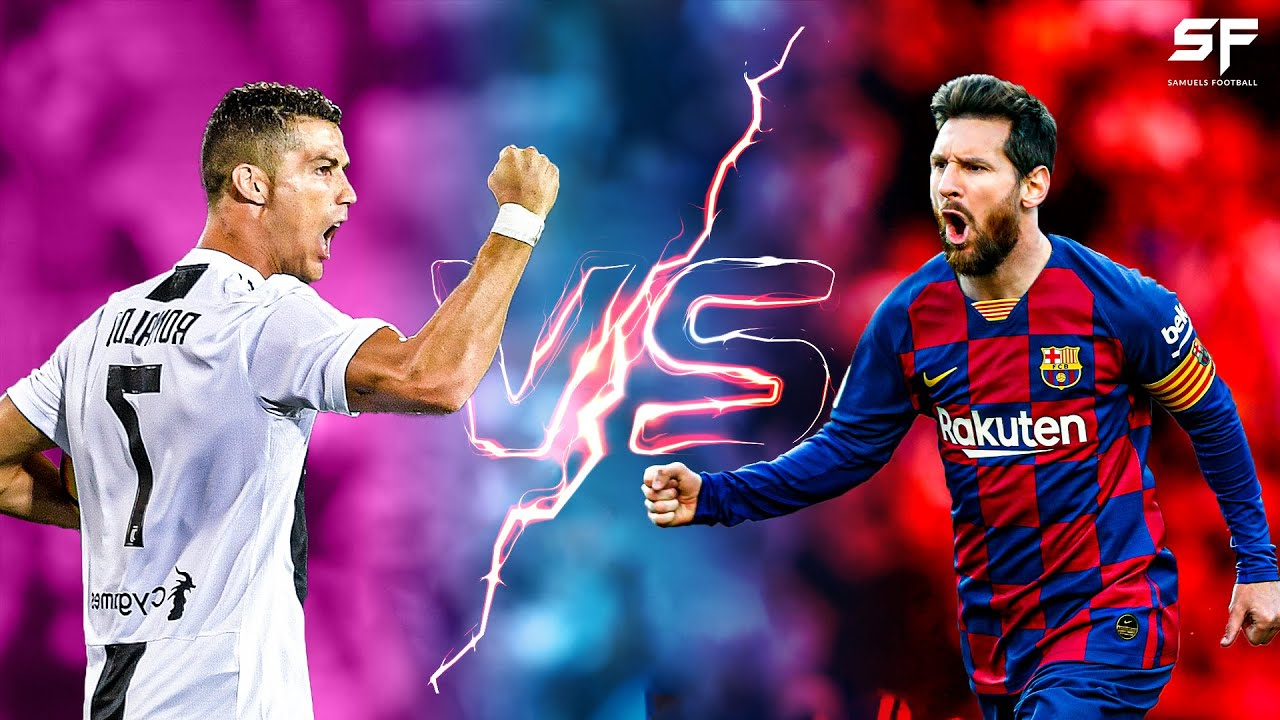

> ## 6.1 Read SQL Tables, Selecting players by name

In [662]:
# Read Cristiano's Data from the database
cris = pd.read_sql("""SELECT player_name,
                                  date,overall_rating,
                                  attacking_work_rate,
                                  crossing,
                                  finishing,
                                  shot_power,
                                  heading_accuracy,
                                  free_kick_accuracy,
                                  sprint_speed,
                                  dribbling,
                                  agility
                                    
                      FROM Player 
                      LEFT JOIN Player_Attributes
                      ON Player.player_api_id = Player_Attributes.player_api_id
                    
                      WHERE player_name = 'Cristiano Ronaldo'
                        
                      ORDER by date
                      """, database_connection)

# Read Messi's Data from the database
messi = pd.read_sql("""SELECT player_name,
                                  date,overall_rating,
                                  attacking_work_rate,
                                  crossing,
                                  finishing,
                                  shot_power,
                                  heading_accuracy,
                                  free_kick_accuracy,
                                  sprint_speed,
                                  dribbling,
                                  agility
                                    
                      FROM Player 
                      LEFT JOIN Player_Attributes
                      ON Player.player_api_id = Player_Attributes.player_api_id
                    
                      WHERE player_name = 'Lionel Messi'
                        
                      ORDER by date
                      """, database_connection)
# Covert date column
cris["date"] = pd.to_datetime(cris["date"])
messi["date"] = pd.to_datetime(messi["date"])

> ## 6.2 View the first 5 entries in each player's dataframe
>> ### 6.2.1 Cristiano Ronaldo's Table

In [668]:
cris.head()

player_name       date  overall_rating attacking_work_rate  crossing  \
0  Cristiano Ronaldo 2007-02-22              87                high        80   
1  Cristiano Ronaldo 2007-08-30              91                high        88   
2  Cristiano Ronaldo 2008-08-30              91                high        89   
3  Cristiano Ronaldo 2009-02-22              90                high        89   
4  Cristiano Ronaldo 2009-08-30              89                high        86   

   finishing  shot_power  heading_accuracy  free_kick_accuracy  sprint_speed  \
0         71          80                74                  64            93   
1         85          90                84                  88            94   
2         92          92                82                  94            94   
3         91          90                82                  93            94   
4         90          91                88                  88            92   

   dribbling  agility  
0         95       94  
1         97       94  
2         97       94  
3         97       94  
4         93       94

>> ### 6.2.2 Lionel Messi's Table

In [669]:
messi.head()

player_name       date  overall_rating attacking_work_rate  crossing  \
0  Lionel Messi 2007-02-22              85                high        85   
1  Lionel Messi 2007-08-30              86                high        83   
2  Lionel Messi 2008-08-30              90                high        81   
3  Lionel Messi 2009-02-22              90                high        81   
4  Lionel Messi 2009-08-30              90                high        82   

   finishing  shot_power  heading_accuracy  free_kick_accuracy  sprint_speed  \
0         76          83                59                  87            94   
1         80          84                63                  70            95   
2         87          82                64                  70            95   
3         87          79                64                  76            93   
4         90          79                64                  74            93   

   dribbling  agility  
0         95       96  
1         95       96  
2         97       96  
3         97       96  
4         97       96

> ## 6.3 Summary Statistics for Both Players
>> ### 6.3.1 Cristiano Ronaldo's Summary Statitics

In [676]:
cris.describe()

overall_rating   crossing  finishing  shot_power  heading_accuracy  \
count       25.000000  25.000000   25.00000   25.000000         25.000000   
mean        91.280000  83.880000   91.12000   92.760000         85.520000   
std          1.541644   2.107922    4.85043    2.976015          2.785678   
min         87.000000  80.000000   71.00000   80.000000         74.000000   
25%         91.000000  83.000000   90.00000   93.000000         86.000000   
50%         92.000000  83.000000   92.00000   94.000000         86.000000   
75%         92.000000  84.000000   95.00000   94.000000         87.000000   
max         93.000000  89.000000   95.00000   95.000000         88.000000   

       free_kick_accuracy  sprint_speed  dribbling    agility  
count           25.000000     25.000000  25.000000  25.000000  
mean            81.640000     93.760000  92.640000  92.960000  
std              6.467096      0.522813   2.196209   1.206924  
min             64.000000     92.000000  90.000000  90.000000  
25%             79.000000     94.000000  90.000000  93.000000  
50%             79.000000     94.000000  93.000000  93.000000  
75%             87.000000     94.000000  93.000000  94.000000  
max             94.000000     94.000000  97.000000  94.000000

>> ### 6.3.3 Lionel Messi's Summary Statitics

In [677]:
messi.describe()

overall_rating   crossing  finishing  shot_power  heading_accuracy  \
count       26.000000  26.000000  26.000000   26.000000         26.000000   
mean        92.192308  83.346154  92.230769   80.307692         69.269231   
std          2.545887   1.671940   5.077855    1.192283          3.606191   
min         85.000000  80.000000  76.000000   79.000000         59.000000   
25%         90.000000  82.250000  91.250000   80.000000         69.000000   
50%         93.000000  84.000000  93.500000   80.000000         71.000000   
75%         94.000000  84.000000  94.750000   80.750000         71.000000   
max         94.000000  85.000000  97.000000   84.000000         73.000000   

       free_kick_accuracy  sprint_speed  dribbling    agility  
count           26.000000     26.000000  26.000000  26.000000  
mean            84.115385     90.846154  96.461538  94.384615  
std              6.426986      2.091742   0.646886   1.267341  
min             70.000000     88.000000  95.000000  92.000000  
25%             82.000000     90.000000  96.000000  94.000000  
50%             86.000000     90.000000  97.000000  94.000000  
75%             90.000000     92.000000  97.000000  96.000000  
max             90.000000     95.000000  97.000000  96.000000

> ## 6.4 Dates under consideration
- Let's see the dates included in this dataset

In [680]:
print("Data for both players is from", cris["date"].min(), "to", messi["date"].max())

Data for both players is from 2007-02-22 00:00:00 to 2015-12-17 00:00:00


* So data is from $22/02/2007$ to $17/12/2015$.
* This is about 8 years worth of data.

> ## 6.5 Data Visualization and Analysis

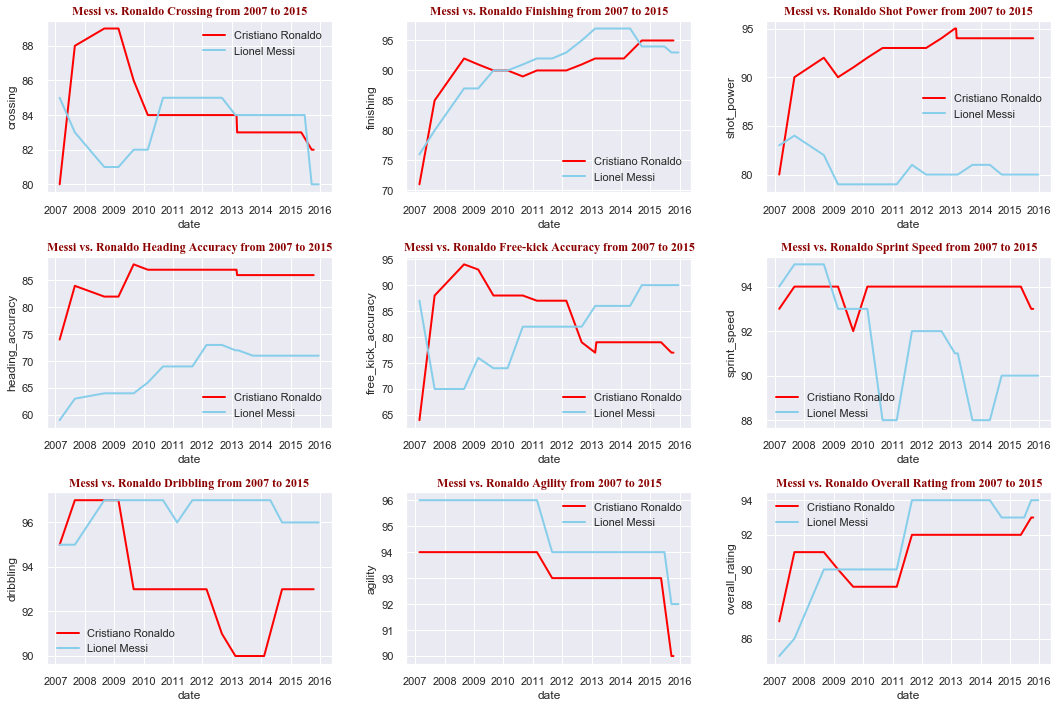

In [714]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.lineplot(x='date', y='crossing', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Crossing from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sns.lineplot(x='date', y='crossing', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,2)
sns.lineplot(x='date', y='finishing', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Finishing from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sns.lineplot(x='date', y='finishing', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,3)
sns.lineplot(x='date', y='shot_power', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Shot Power from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sns.lineplot(x='date', y='shot_power', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')


plt.subplot(3,3,4)
sns.lineplot(x='date', y='heading_accuracy', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Heading Accuracy from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sns.lineplot(x='date', y='heading_accuracy', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,5)
sns.lineplot(x='date', y='free_kick_accuracy', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Free-kick Accuracy from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sns.lineplot(x='date', y='free_kick_accuracy', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,6)
sns.lineplot(x='date', y='sprint_speed', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Sprint Speed from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sns.lineplot(x='date', y='sprint_speed', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,7)
sns.lineplot(x='date', y='dribbling', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Dribbling from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sns.lineplot(x='date', y='dribbling', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,8)
sns.lineplot(x='date', y='agility', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Agility from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sns.lineplot(x='date', y='agility', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,9)
sns.lineplot(x='date', y='overall_rating', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Overall Rating from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sns.lineplot(x='date', y='overall_rating', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.tight_layout()

### $Analysis$
- From 2007 Ronaldo and Messi's Overall Ratings have been rising, although Lionel Messi overtook Cristiano Ronaldo the end of 2008.

- Cristiano Ronaldo outpowered Lionel Messi on Shot Power and has been dominating since.

- We see that Lionel Messi has been a better dribbler than Cristiano Ronaldo.

- The two have been battling it out on finishing, with their graphs very close.

- Christiano Ronaldo is a better header than Messi, perharps due to the aerial advantage that Ronaldo has, compared to a shorter Messi.

- Lionel Messi improved significantly on free-kick taking, surpassing Ronaldo from mid-2012.